This analysis is in the order of Female then Male

In [1]:
install.packages('qtl') #Main package, for analysis
install.packages('qtlcharts') #accessory, for displaying graphs
install.packages('LinkageMapView') #accessory, for displaying linkage maps
install.packages('rcompanion')# for plotNormalHistogram

Warning message in install.packages("qtl"):
"'lib = "C:/Program Files/R/R-3.6.1/library"' is not writable"


ERROR: Error in install.packages("qtl"): unable to install packages


In [1]:
library(qtl) #load packages
library(qtlcharts)
library(LinkageMapView)
library(rcompanion)

Warning message:
"package 'qtl' was built under R version 3.6.2"
Warning message:
"package 'qtlcharts' was built under R version 3.6.2"
Warning message:
"package 'LinkageMapView' was built under R version 3.6.2"
Warning message:
"package 'rcompanion' was built under R version 3.6.2"


In [2]:
#Collecting enviroment variables
print("Make sure to input names AS THEY APPEAR on the csv!!") #Just a user warning
fileName <- readline("Enter file name (Either FemaleMap.csv or MaleMap.csv): ") #Mapping table file
genotypeName <- c(readline("First Genotype (homozygous) (For example ll): "),
                  readline("Second Genotype (heterozygous) (for example lm): ")) #For example "nn", "np"
alleleName <- c(substr(genotypeName[2],1,1) ,substr(genotypeName[2],2,2))
naNames <- c("NA","--") #For example "NA", "--"
colNum <- as.numeric(readline("Column Number: ")) #Column for pheno of interest

[1] "Make sure to input names AS THEY APPEAR on the csv!!"


Enter file name (Either FemaleMap.csv or MaleMap.csv):  FemaleMap.csv
First Genotype (homozygous) (For example ll):  ll
Second Genotype (heterozygous) (for example lm):  lm
Column Number:  19


 --Read the following data:
	 294  individuals
	 1100  markers
	 38  phenotypes


Warning message in summary.cross(cross):
"Some markers at the same position on chr 1,2,4,5,7,8,9,10,11,12,13,14,16,17,18,19; use jittermap()."


 --Cross type: bc 


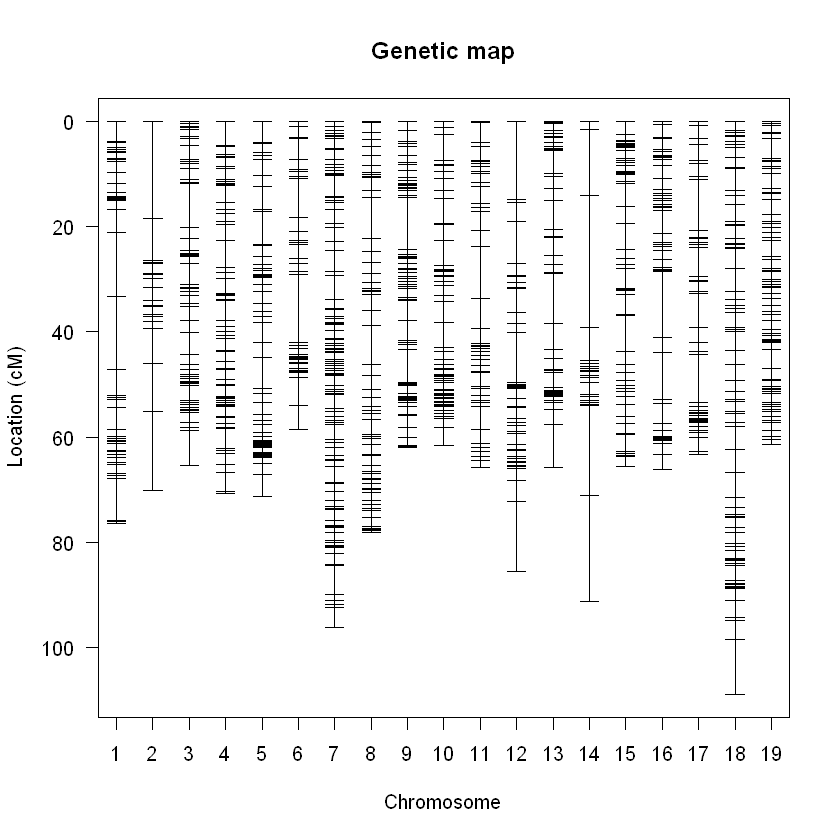

In [3]:
#Map generation
Map <- read.cross(format = 'csv',file = fileName 
                  ,genotypes = genotypeName,
                  alleles = alleleName,na.strings = naNames) #generate linkage map
Map <- jittermap(Map) #make sure no markers are in the same location
Map <- calc.genoprob(Map,step = 1,map.function = "kosambi") #associate markers with full genotypes
plot.map(Map) #draw linkage map

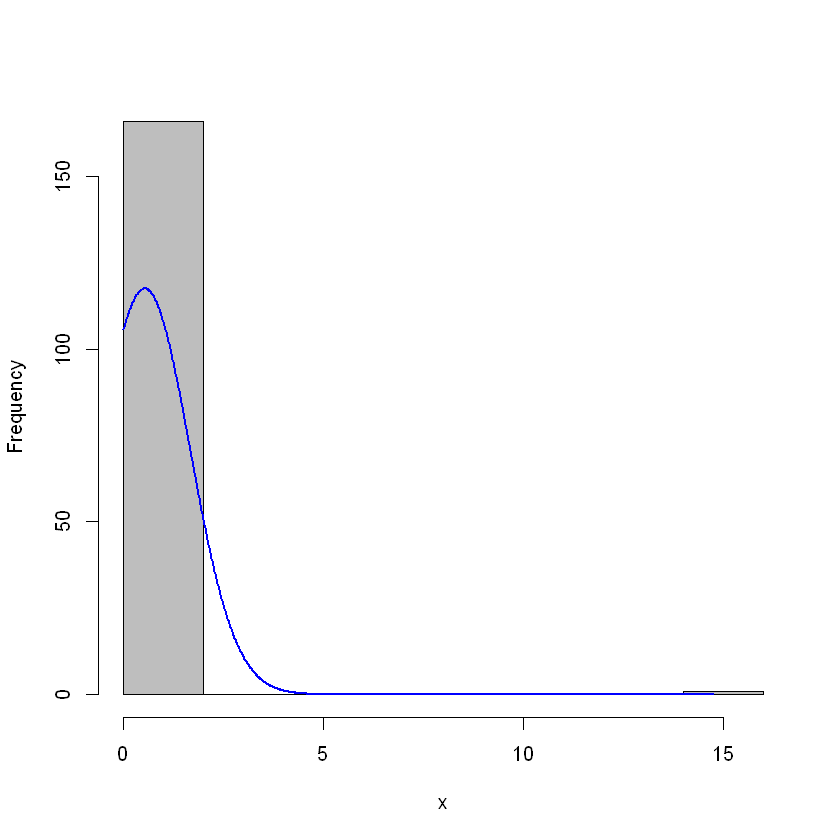

In [4]:
plotNormalHistogram(Map$pheno[,colNum]) #normal histogram of pheno of interest

Outliers exist in this dataset. Will need to be analyized. 

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addc

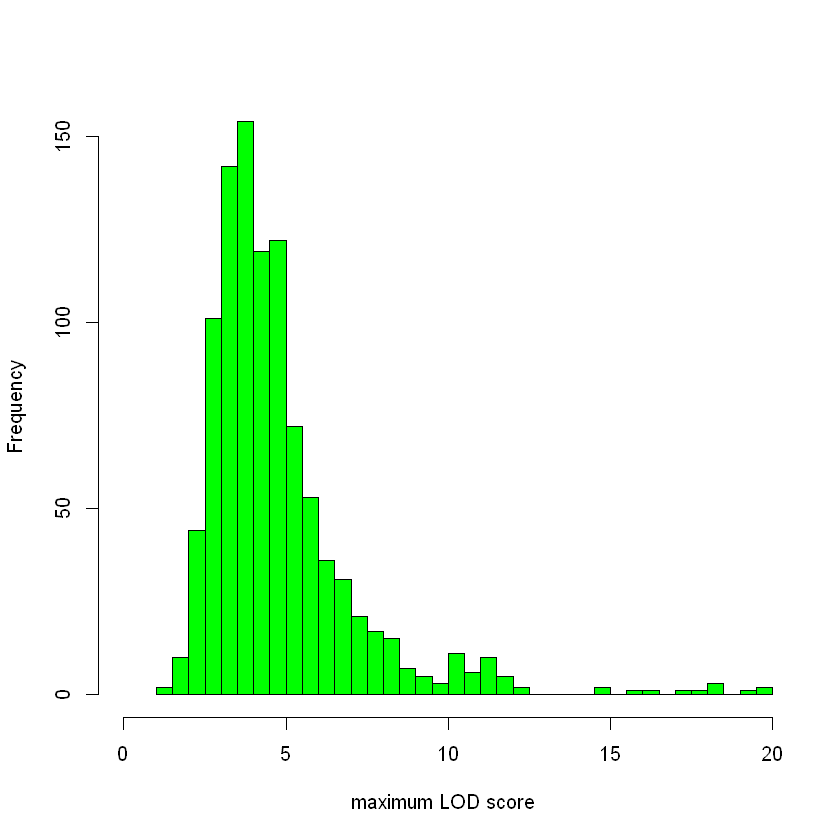

In [5]:
#Compute statistically significant values
TraitCIM1000 <- cim(Map,pheno.col = colNum,method = "hk",
                    map.function = "kosambi",n.perm = 1000) # Function will take a moment to run, determines LOD value
plot(TraitCIM1000,col = 'green') #show distribution of lod scores
LOD5 <- summary(TraitCIM1000)[1]

[1] "If nothing shows up, the values \n      are below the LOD5 score"


,chr,pos,lod
,<fct>,<dbl>,<dbl>
1_3145449,1,14.449016,0.4343017
c2.loc22,2,22.000000,1.7810080
3_5417721,3,32.414027,1.2447803
4_11595005,4,40.609035,0.5317517
c5.loc56,5,56.000000,0.2280029
6_2534068,6,7.326005,0.4989795
7_2809369,7,9.318015,0.5207467
c8.loc24,8,24.000000,0.7409732
c9.loc61,9,61.000000,0.4880106


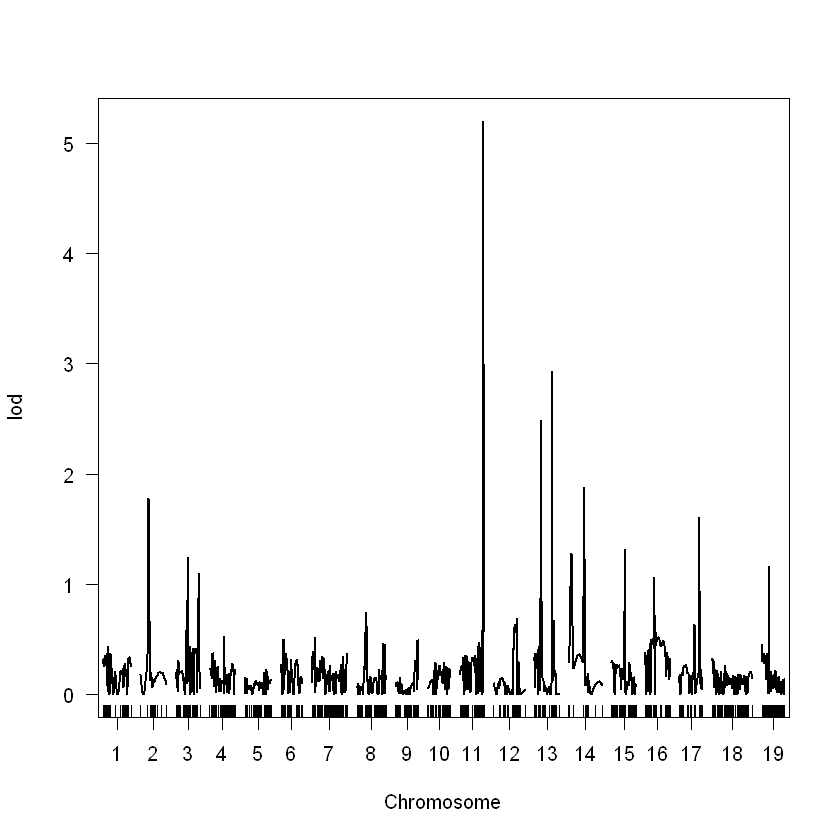

In [6]:
#Deterime LOD Values
TraitCIM<-cim(Map,pheno.col = colNum,method = "hk",
              map.function = "kosambi") #Generate LOD Values
plot(TraitCIM) #show LOD graph
abline(h = LOD5,col = "blue") #overlay statistically significant line
print("If nothing shows up, the values 
      are below the LOD5 score") #warning for no peaks
summary(TraitCIM)

In [7]:
#Collecting enviroment variables
print("Make sure to input names AS THEY APPEAR on the csv!!") #Just a user warning
fileName <- readline("Enter file name (Either FemaleMap.csv or MaleMap.csv): ") #Mapping table file
genotypeName <- c(readline("First Genotype (homozygous) (For example ll): "),
                  readline("Second Genotype (heterozygous) (for example lm): ")) #For example "nn", "np"
alleleName <- c(substr(genotypeName[2],1,1) ,substr(genotypeName[2],2,2))
naNames <- c("NA","--") #For example "NA", "--"
colNum <- as.numeric(readline("Column Number: ")) #Column for pheno of interest

[1] "Make sure to input names AS THEY APPEAR on the csv!!"


Enter file name (Either FemaleMap.csv or MaleMap.csv):  MaleMap.csv
First Genotype (homozygous) (For example ll):  nn
Second Genotype (heterozygous) (for example lm):  np
Column Number:  19


 --Read the following data:
	 294  individuals
	 1128  markers
	 38  phenotypes


Warning message in summary.cross(cross):
"Some markers at the same position on chr 1,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19; use jittermap()."


 --Cross type: bc 


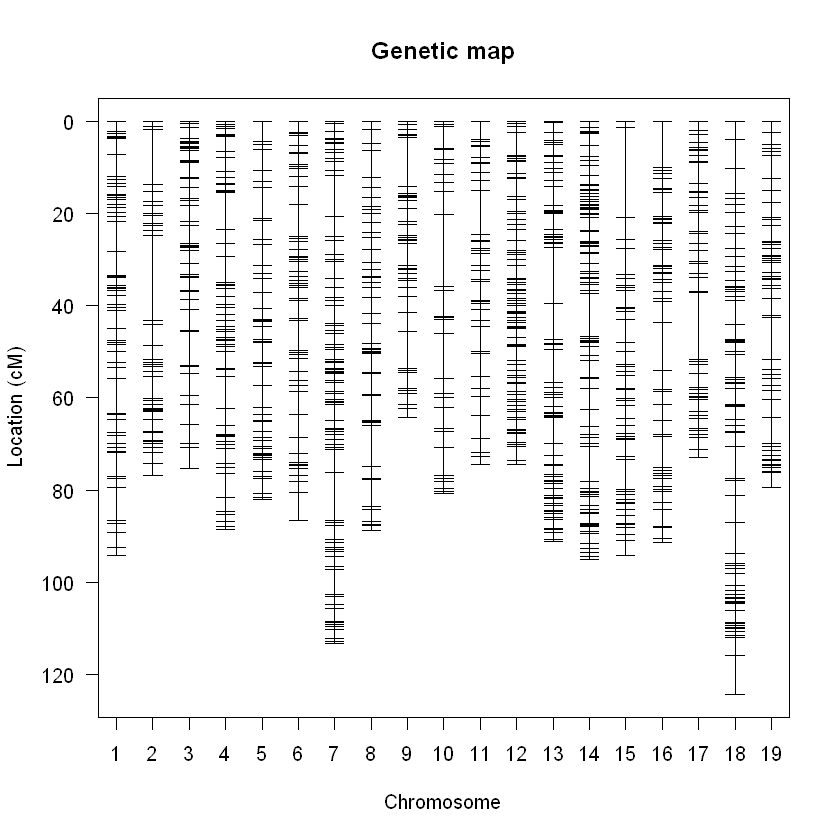

In [8]:
#Map generation
Map <- read.cross(format = 'csv',file = fileName 
                  ,genotypes = genotypeName,
                  alleles = alleleName,na.strings = naNames) #generate linkage map
Map <- jittermap(Map) #make sure no markers are in the same location
Map <- calc.genoprob(Map,step = 1,map.function = "kosambi") #associate markers with full genotypes
plot.map(Map) #draw linkage map

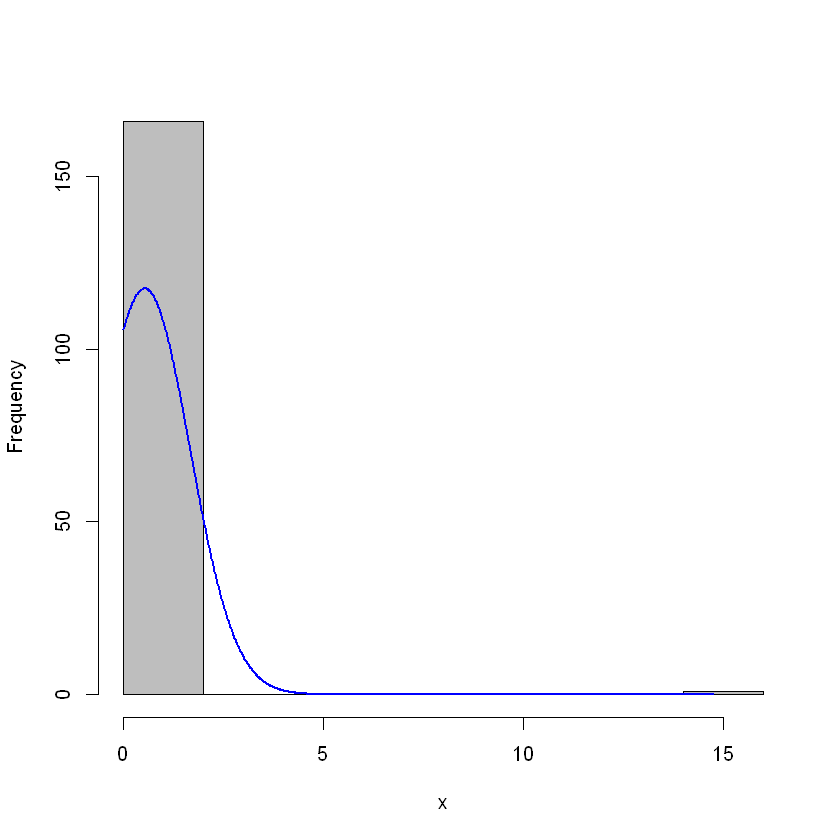

In [9]:
plotNormalHistogram(Map$pheno[,colNum]) #normal histogram of pheno of interest

Outliers exist in this data. 

In [ ]:
#Compute statistically significant values
TraitCIM1000 <- cim(Map,pheno.col = colNum,method = "hk",
                    map.function = "kosambi",n.perm = 1000) # Function will take a moment to run, determines LOD value
plot(TraitCIM1000,col = 'green') #show distribution of lod scores
LOD5 <- summary(TraitCIM1000)[1]

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"


In [ ]:
#Deterime LOD Values
TraitCIM<-cim(Map,pheno.col = colNum,method = "hk",
              map.function = "kosambi") #Generate LOD Values
plot(TraitCIM) #show LOD graph
abline(h = LOD5,col = "blue") #overlay statistically significant line
print("If nothing shows up, the values 
      are below the LOD5 score") #warning for no peaks
summary(TraitCIM)